In [ ]:
import json
import nltk
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
#os.getcwd()

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ML_preprocess_data_v2.csv to ML_preprocess_data_v2.csv
User uploaded file "ML_preprocess_data_v2.csv" with length 18012281 bytes


In [ ]:
#df=pd.read_csv('ML_preprocess_data.csv')
df=pd.read_csv('ML_preprocess_data_v2.csv')

In [ ]:
df.head()

,Target,Enrollment,Gender,StudyType,FundedBys_Others,FundedBys_Industries,FundedBys_NIH,FundedBys_USA_FED,StudyDesign1,StudyDesign2,StudyDesign3,StudyDesign4,StudyDesign5,StudyDesign6,StudyDesign7,StudyDesign8,StudyDesign9,StudyDesign10,StudyDesign11,StudyDesign12,StudyDesign13,StudyDesign14,StudyDesign15,StudyDesign16,StudyDesign17,StudyDesign18,StudyDesign19,StudyDesign20,StudyDesign21,StudyDesign22,StudyDesign23,StudyDesign24,StudyDesign25,StudyDesign26,StudyDesign27,StudyDesign28,StudyDesign29,StudyDesign30,StudyDesign31,StudyDesign32,...,StudyDesign56,BasicScience,DeviceFeasibility,Diagnostic,Health Services Research,Other,Prevention,Screening,SupportiveCare,PrimaryPurposeMissing,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
0,1,7.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,1,0.002222,0.002222,0.002222,0.002222,0.086691,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.110866,0.002222,0.002222,0.305871,0.002222,0.275135,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.165881
1,1,1.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,1,0.561842,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.334454,0.003704,0.003704
2,1,100.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,1,0.003333,0.003333,0.003333,0.675079,0.231588,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
3,0,12.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,1,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.451532,0.004167,0.004167,0.004167,0.004167,0.431802,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167
4,1,99.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0,0,0,0,0,0,0,0,1,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.172236,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.505542,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.172222,0.005556,0.005556,0.005556


In [ ]:
X=df.loc[:,df.columns != 'Target']  # All the features 
y=df['Target']   #  Target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
def print_metrics(model, y_test, y_pred):
    print("Model: Random Forest, trees= {}".format(model.n_estimators))
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision (positive class):",metrics.precision_score(y_test, y_pred, average='binary'))
    print("Recall (positive class):",metrics.recall_score(y_test, y_pred, average='binary'))
    print("F1-score (positive class):",metrics.f1_score(y_test, y_pred, average='binary'))

In [ ]:
def plot_confusion_matrix(model, X_test, y_test):
    print("Confusion matrix:\n")
    plt.rcParams['figure.figsize'] = (8, 6)
    metrics.plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

In [ ]:
def plot_precision_recall(model, X_test, y_test):
    plt.rcParams['figure.figsize'] = (8, 6)
    metrics.plot_precision_recall_curve(model, X_test, y_test)
    plt.title("Precision-Recall Curve for model with {} trees".format(model.n_estimators))
    plt.show()   

In [ ]:
def plot_roc(model, y_test, y_pred):
    plt.rcParams['figure.figsize'] = (8, 6)
    fpr_rate, tpr_rate, _ = metrics.roc_curve(y_test, y_pred)
    auc = metrics.auc(fpr_rate, tpr_rate)
    plt.plot(fpr_rate, tpr_rate, label='Random Forest, {} trees, AUC = {:.2f}'.format(model.n_estimators, auc),color='red')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate(TPR)')
    plt.title('ROC curve')
    plt.legend(loc='lower right')
    plt.show()

Confusion matrix:

Model: Random Forest, trees= 200
Accuracy: 0.7978333333333333
Precision (positive class): 0.8186968838526912
Recall (positive class): 0.7673415200796548
F1-score (positive class): 0.7921877676888812


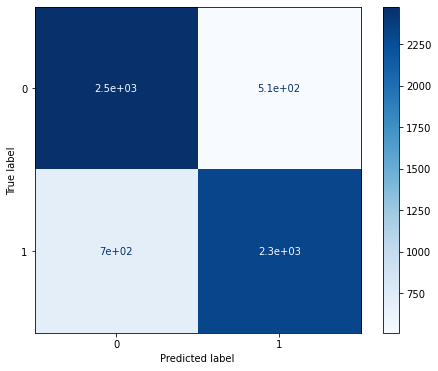

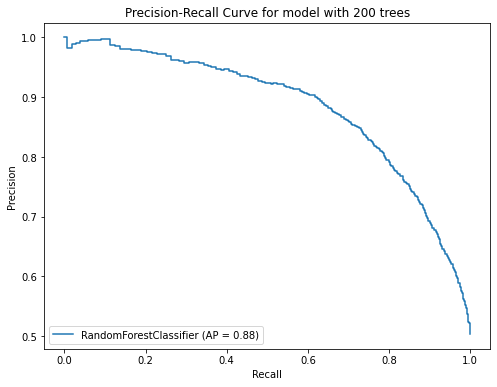

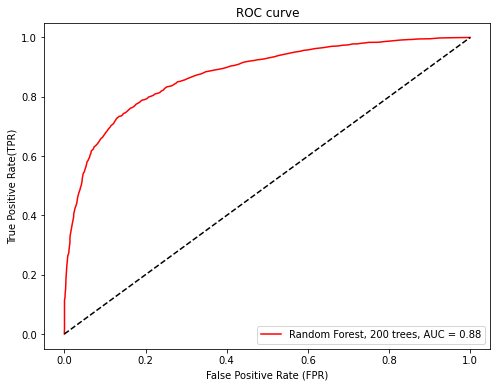

In [ ]:
SEED = 50
rf_150=RandomForestClassifier(n_estimators=200, verbose=0, random_state= SEED, class_weight= 'balanced')
rf_150.fit(X_train,y_train)
y_pred_rf150=rf_150.predict(X_test)
y_pred_rf150_prob=rf_150.predict_proba(X_test)[:,1]
plot_confusion_matrix(rf_150, X_test, y_test)     
print_metrics(rf_150, y_test, y_pred_rf150)
plot_precision_recall(rf_150, X_test, y_test)
plot_roc(rf_150, y_test, y_pred_rf150_prob)

In [ ]:
print(confusion_matrix(y_test, y_pred_rf150))

[[2475  512]
 [ 701 2312]]


# Terminated Trial -Average topic probabilities for each primary purpose category

In [ ]:
df2 = pd.DataFrame (y_pred_rf150,columns=['Prediction'])
df2

,Prediction
0,0
1,0
2,1
3,0
4,0
...,...
5995,1
5996,0
5997,0
5998,0


In [ ]:
df3 = X_test.loc[:, 'BasicScience':'Topic_29']
df3 = df3.reset_index(drop=True)
df3

,BasicScience,DeviceFeasibility,Diagnostic,Health Services Research,Other,Prevention,Screening,SupportiveCare,PrimaryPurposeMissing,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
0,0,0,0,0,0,1,0,0,0,0.118136,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.424710,0.003704,0.003704,0.003704,0.003704,0.086718,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.274140
1,0,0,0,0,1,0,0,0,0,0.001852,0.001852,0.001852,0.001852,0.001852,0.404135,0.001852,0.001852,0.001852,0.001852,0.197065,0.001852,0.290404,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852,0.060248,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852
2,0,0,0,0,0,0,0,0,1,0.004167,0.004167,0.254167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.129167,0.129167,0.004167,0.004167,0.004167,0.004167,0.129167,0.004167,0.254167,0.004167,0.004167,0.004167
3,0,0,0,0,0,0,1,0,0,0.003704,0.251691,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.382268,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.266041,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704
4,0,0,0,0,0,1,0,0,0,0.004167,0.253661,0.188514,0.004167,0.004167,0.004167,0.004167,0.192628,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.129167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.131864,0.004167,0.004167,0.004167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,1,0.003030,0.003030,0.003030,0.373451,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.541700,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030
5996,0,0,0,0,0,0,0,0,1,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.803875,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.118348,0.002778,0.002778,0.002778,0.002778
5997,0,0,0,0,0,1,0,0,0,0.002564,0.216262,0.002564,0.002564,0.002564,0.002564,0.002564,0.080969,0.002564,0.002564,0.002564,0.002564,0.002564,0.002564,0.002564,0.002564,0.173850,0.002564,0.002564,0.002564,0.083261,0.002564,0.002564,0.002564,0.002564,0.002564,0.002564,0.002564,0.381556,0.002564
5998,0,0,0,0,0,0,0,1,0,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.526294,0.004762,0.004762,0.004762,0.340372,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762


In [ ]:
df4 = pd.concat([df2,df3], axis=1)

In [ ]:
df4

,Prediction,BasicScience,DeviceFeasibility,Diagnostic,Health Services Research,Other,Prevention,Screening,SupportiveCare,PrimaryPurposeMissing,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
0,0,0,0,0,0,0,1,0,0,0,0.118136,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.424710,0.003704,0.003704,0.003704,0.003704,0.086718,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.274140
1,0,0,0,0,0,1,0,0,0,0,0.001852,0.001852,0.001852,0.001852,0.001852,0.404135,0.001852,0.001852,0.001852,0.001852,0.197065,0.001852,0.290404,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852,0.060248,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852
2,1,0,0,0,0,0,0,0,0,1,0.004167,0.004167,0.254167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.129167,0.129167,0.004167,0.004167,0.004167,0.004167,0.129167,0.004167,0.254167,0.004167,0.004167,0.004167
3,0,0,0,0,0,0,0,1,0,0,0.003704,0.251691,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.382268,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.266041,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704
4,0,0,0,0,0,0,1,0,0,0,0.004167,0.253661,0.188514,0.004167,0.004167,0.004167,0.004167,0.192628,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.129167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.131864,0.004167,0.004167,0.004167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0,0,0,0,0,0,0,1,0.003030,0.003030,0.003030,0.373451,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.541700,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030
5996,0,0,0,0,0,0,0,0,0,1,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.803875,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.118348,0.002778,0.002778,0.002778,0.002778
5997,0,0,0,0,0,0,1,0,0,0,0.002564,0.216262,0.002564,0.002564,0.002564,0.002564,0.002564,0.080969,0.002564,0.002564,0.002564,0.002564,0.002564,0.002564,0.002564,0.002564,0.173850,0.002564,0.002564,0.002564,0.083261,0.002564,0.002564,0.002564,0.002564,0.002564,0.002564,0.002564,0.381556,0.002564
5998,0,0,0,0,0,0,0,0,1,0,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.526294,0.004762,0.004762,0.004762,0.340372,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762


In [ ]:
df5 = df4.loc[(df4['Prediction']==1)]

In [ ]:
df5

,Prediction,BasicScience,DeviceFeasibility,Diagnostic,Health Services Research,Other,Prevention,Screening,SupportiveCare,PrimaryPurposeMissing,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
2,1,0,0,0,0,0,0,0,0,1,0.004167,0.004167,0.254167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.129167,0.129167,0.004167,0.004167,0.004167,0.004167,0.129167,0.004167,0.254167,0.004167,0.004167,0.004167
7,1,0,0,0,0,0,0,0,0,1,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.103326,0.003333,0.003333,0.103987,0.003333,0.003333,0.003333,0.003333,0.284763,0.003333,0.113922,0.003333,0.003333,0.112710,0.003333,0.003333,0.003333,0.201293,0.003333,0.003333,0.003333
8,1,0,0,0,0,0,0,0,0,1,0.002381,0.002381,0.002381,0.346655,0.002381,0.002381,0.002381,0.002381,0.138625,0.002381,0.376195,0.002381,0.002381,0.002381,0.002381,0.002381,0.076620,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381
15,1,0,0,0,0,0,0,0,0,1,0.003333,0.003333,0.387604,0.003333,0.003333,0.317024,0.205372,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
16,1,0,0,0,0,0,0,0,0,1,0.005556,0.005556,0.202860,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.182292,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.464849,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5986,1,0,0,0,0,0,0,0,0,1,0.002381,0.002381,0.002381,0.930952,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381
5988,1,0,0,0,0,0,0,0,0,1,0.002381,0.002381,0.163381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.377610,0.080011,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.148048,0.002381,0.002381,0.171426,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381
5989,1,0,0,0,0,0,0,0,0,1,0.677778,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111
5994,1,0,0,0,0,0,0,0,0,1,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.627393,0.004762,0.004762,0.004762,0.004762,0.239273,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762


In [ ]:
dfBS = df5.groupby(['BasicScience']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})

In [ ]:
dfBS = dfBS.loc[[1]]
dfBS

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
BasicScience,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.041168,0.010276,0.025375,0.044466,0.026405,0.06268,0.034299,0.026507,0.046358,0.008847,0.040096,0.007793,0.036885,0.049076,0.033051,0.042767,0.031742,0.017939,0.050261,0.025564,0.025047,0.024986,0.048621,0.022426,0.02228,0.017624,0.031301,0.058276,0.02769,0.060194


In [ ]:
dfBS = dfBS.reset_index(drop=True)
dfBS

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
0,0.041168,0.010276,0.025375,0.044466,0.026405,0.06268,0.034299,0.026507,0.046358,0.008847,0.040096,0.007793,0.036885,0.049076,0.033051,0.042767,0.031742,0.017939,0.050261,0.025564,0.025047,0.024986,0.048621,0.022426,0.02228,0.017624,0.031301,0.058276,0.02769,0.060194


In [ ]:
dfDF = df5.groupby(['DeviceFeasibility']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfDF = dfDF.loc[[1]]
#dfDF = dfDF.reset_index(drop=True)
#dfDF = dfDF.rename(index={0: 1})
dfDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
DeviceFeasibility,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.00494,0.096014,0.038102,0.00494,0.00494,0.013638,0.053468,0.00494,0.050108,0.00494,0.00494,0.093509,0.046607,0.00494,0.019308,0.00494,0.043038,0.012396,0.014678,0.042262,0.00494,0.058463,0.00494,0.058829,0.049332,0.038912,0.00494,0.1734,0.025095,0.018499


In [ ]:
dfD = df5.groupby(['Diagnostic']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfD = dfD.loc[[1]]
dfD = dfD.rename(index={1: 2})
dfD

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
Diagnostic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.016502,0.02449,0.013914,0.059006,0.026531,0.016367,0.065268,0.038671,0.118897,0.050874,0.014517,0.019077,0.017784,0.018416,0.032874,0.031443,0.045896,0.015137,0.045421,0.018708,0.007,0.021065,0.017462,0.083834,0.022243,0.019236,0.025197,0.05472,0.04102,0.018434


In [ ]:
dfHSR = df5.groupby(['Health Services Research']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfHSR = dfHSR.loc[[1]]
dfHSR = dfHSR.rename(index={1: 3})
dfHSR

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
Health Services Research,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,0.028319,0.019235,0.01549,0.061093,0.021557,0.0123,0.018076,0.020243,0.011871,0.042808,0.024767,0.014026,0.028132,0.038777,0.022649,0.018955,0.041839,0.062444,0.03489,0.04781,0.022335,0.004693,0.091993,0.05787,0.041771,0.019183,0.010015,0.055171,0.02725,0.084437


In [ ]:
dfO = df5.groupby(['Other']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfO= dfO.loc[[1]]
dfO = dfO.rename(index={1: 4})
dfO

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
Other,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,0.025399,0.036027,0.030149,0.033807,0.052077,0.039229,0.038604,0.041049,0.044385,0.03697,0.045996,0.019412,0.02081,0.023175,0.048065,0.021814,0.027514,0.014423,0.042697,0.035011,0.014909,0.029308,0.024855,0.057781,0.022196,0.018024,0.031823,0.03253,0.039682,0.052279


In [ ]:
dfP = df5.groupby(['Prevention']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfP = dfP.loc[[1]]
dfP = dfP.rename(index={1: 5})
dfP

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
Prevention,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,0.031351,0.016839,0.046308,0.048923,0.041862,0.039651,0.022062,0.029388,0.018074,0.033353,0.041823,0.01118,0.021531,0.042011,0.032244,0.083347,0.032186,0.033306,0.043974,0.03558,0.022981,0.038276,0.019342,0.023875,0.035378,0.031485,0.040074,0.020143,0.042318,0.021134


In [ ]:
dfSG = df5.groupby(['Screening']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfSG = dfSG.loc[[1]]
dfSG = dfSG.rename(index={1: 6})
dfSG

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
Screening,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,0.034495,0.021521,0.063216,0.004502,0.027229,0.079733,0.015445,0.017861,0.072486,0.02331,0.004502,0.004502,0.004502,0.004502,0.004502,0.02535,0.004502,0.038118,0.011681,0.004502,0.004502,0.018199,0.055225,0.058099,0.054144,0.067004,0.068649,0.131763,0.071452,0.004502


In [ ]:
dfS = df5.groupby(['SupportiveCare']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfS = dfS.loc[[1]]
dfS = dfS.rename(index={1: 7})
dfS

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
SupportiveCare,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,0.028872,0.02638,0.022514,0.088859,0.030905,0.010033,0.041765,0.059305,0.060411,0.024523,0.017684,0.023386,0.010492,0.025599,0.050273,0.008953,0.047345,0.044441,0.058792,0.01644,0.010442,0.020708,0.05048,0.012339,0.035357,0.020773,0.060943,0.020401,0.029191,0.042396


In [ ]:
dfM = df5.groupby(['PrimaryPurposeMissing']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfM = dfM.loc[[1]]
dfM = dfM.rename(index={1: 8})
dfM

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
PrimaryPurposeMissing,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,0.032332,0.021524,0.057387,0.066025,0.088604,0.041357,0.024661,0.020247,0.025723,0.048077,0.03474,0.019168,0.031654,0.046183,0.024318,0.026441,0.022993,0.031569,0.031513,0.037098,0.015007,0.036945,0.023879,0.024684,0.040656,0.030642,0.023461,0.030038,0.021035,0.022036


In [ ]:
#df_PPvTopic = pd.concat([dfBS, dfDF, dfD, dfHSR ,dfO ,dfP, dfS, dfM], axis=1)
df_PPvTopic = dfBS

In [ ]:
df_PPvTopic = df_PPvTopic.append(dfDF, ignore_index = True)
df_PPvTopic = df_PPvTopic.append(dfD, ignore_index = True)
df_PPvTopic = df_PPvTopic.append(dfHSR, ignore_index = True) 
df_PPvTopic = df_PPvTopic.append(dfO, ignore_index = True)
df_PPvTopic = df_PPvTopic.append(dfP, ignore_index = True)
df_PPvTopic = df_PPvTopic.append(dfSG, ignore_index = True)
df_PPvTopic = df_PPvTopic.append(dfS, ignore_index = True)
df_PPvTopic = df_PPvTopic.append(dfM, ignore_index = True)

In [ ]:
df_PPvTopic = df_PPvTopic.rename(index={0: 'BasicScience', 1:'DeviceFeasibility',2:'Diagnostic',
                                      3:'HealthServiceResearch',4:'Other',5:'Prevention',6:'Screening',
                                      7:'SupportiveCare',8:'Missing' })

In [ ]:
df_PPvTopic

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
BasicScience,0.041168,0.010276,0.025375,0.044466,0.026405,0.062680,0.034299,0.026507,0.046358,0.008847,0.040096,0.007793,0.036885,0.049076,0.033051,0.042767,0.031742,0.017939,0.050261,0.025564,0.025047,0.024986,0.048621,0.022426,0.022280,0.017624,0.031301,0.058276,0.027690,0.060194
DeviceFeasibility,0.004940,0.096014,0.038102,0.004940,0.004940,0.013638,0.053468,0.004940,0.050108,0.004940,0.004940,0.093509,0.046607,0.004940,0.019308,0.004940,0.043038,0.012396,0.014678,0.042262,0.004940,0.058463,0.004940,0.058829,0.049332,0.038912,0.004940,0.173400,0.025095,0.018499
Diagnostic,0.016502,0.024490,0.013914,0.059006,0.026531,0.016367,0.065268,0.038671,0.118897,0.050874,0.014517,0.019077,0.017784,0.018416,0.032874,0.031443,0.045896,0.015137,0.045421,0.018708,0.007000,0.021065,0.017462,0.083834,0.022243,0.019236,0.025197,0.054720,0.041020,0.018434
HealthServiceResearch,0.028319,0.019235,0.015490,0.061093,0.021557,0.012300,0.018076,0.020243,0.011871,0.042808,0.024767,0.014026,0.028132,0.038777,0.022649,0.018955,0.041839,0.062444,0.034890,0.047810,0.022335,0.004693,0.091993,0.057870,0.041771,0.019183,0.010015,0.055171,0.027250,0.084437
Other,0.025399,0.036027,0.030149,0.033807,0.052077,0.039229,0.038604,0.041049,0.044385,0.036970,0.045996,0.019412,0.020810,0.023175,0.048065,0.021814,0.027514,0.014423,0.042697,0.035011,0.014909,0.029308,0.024855,0.057781,0.022196,0.018024,0.031823,0.032530,0.039682,0.052279
Prevention,0.031351,0.016839,0.046308,0.048923,0.041862,0.039651,0.022062,0.029388,0.018074,0.033353,0.041823,0.011180,0.021531,0.042011,0.032244,0.083347,0.032186,0.033306,0.043974,0.035580,0.022981,0.038276,0.019342,0.023875,0.035378,0.031485,0.040074,0.020143,0.042318,0.021134
Screening,0.034495,0.021521,0.063216,0.004502,0.027229,0.079733,0.015445,0.017861,0.072486,0.023310,0.004502,0.004502,0.004502,0.004502,0.004502,0.025350,0.004502,0.038118,0.011681,0.004502,0.004502,0.018199,0.055225,0.058099,0.054144,0.067004,0.068649,0.131763,0.071452,0.004502
SupportiveCare,0.028872,0.026380,0.022514,0.088859,0.030905,0.010033,0.041765,0.059305,0.060411,0.024523,0.017684,0.023386,0.010492,0.025599,0.050273,0.008953,0.047345,0.044441,0.058792,0.016440,0.010442,0.020708,0.050480,0.012339,0.035357,0.020773,0.060943,0.020401,0.029191,0.042396
Missing,0.032332,0.021524,0.057387,0.066025,0.088604,0.041357,0.024661,0.020247,0.025723,0.048077,0.034740,0.019168,0.031654,0.046183,0.024318,0.026441,0.022993,0.031569,0.031513,0.037098,0.015007,0.036945,0.023879,0.024684,0.040656,0.030642,0.023461,0.030038,0.021035,0.022036


In [ ]:
#df_PPvTopic.to_csv('wing_PPvsTopic.csv',index=True)

In [ ]:
# https://plotly.com/python/heatmaps/

import plotly.express as px


Topics = df_PPvTopic.columns.tolist()
PrimaryPurpose = df_PPvTopic.index.tolist()
fig = px.imshow(df_PPvTopic,
                labels=dict(x='Topics', y='PrimaryPurpose', color='Probability'), x=Topics ,y=PrimaryPurpose)
fig.update_xaxes(side="top")
fig.show()